In [1]:
import pandas as pd
df = pd.read_csv('City_Citations.csv')


In [2]:
df.head()

,Case_Number,Charge_Description,Violation_Date_Time,Violation_Street_Name,Balance_Due,Vehicle_Make,Vehicle_Model
0,458006,FAILURE TO APPEAR-COURT,10/22/1998 13:30:00,2611 B TEXAS AVE. (COCS M,215.0,NaN,NaN
1,456862,SPEED/POSTED BY STATE,07/10/1996 18:01:00,FM 2818 AT HOLLEMAN,140.0,CHEV,SILV
2,457614,UNSAFE CHANGE/MARK LANE,02/13/1998 03:45:00,600 BLOCK OF UNIVERSITY D,112.0,CHEV,NOVA
3,457572,NO SAFETY BELT,01/09/1998 10:12:00,500 UNIVERSITY DRIVE WEST,121.0,GMC,PU
4,457839,ROW YIELD SIGN,08/10/1998 00:13:00,FM 2818 AND LONGMIRE,112.0,NISSAN,PULSAR


In [4]:
#Sort by datetime
df = df.sort_values('Violation_Date_Time')
df['Violation_Date_Time']= pd.to_datetime(df['Violation_Date_Time'], errors='coerce')
df = df.reset_index()

In [6]:
#Look only at information from 2008 and beyond
df = df.drop(['index'], axis = 1)
df = df[df['Violation_Date_Time'] > '2008-01-01']
df = df.reset_index()

In [ ]:
#What sort of tickets are we dealing with in terms of $$
df['Balance_Due'].value_counts()

In [26]:
#create expensive tickets column
df['costly'] = df['Balance_Due'] > 150

False    157977
True     141845
Name: costly, dtype: int64

In [27]:
df['date'] = df['Violation_Date_Time'].dt.date
df['year'] = df['Violation_Date_Time'].dt.year
df['day'] = df['Violation_Date_Time'].dt.dayofweek
df['month'] = df['Violation_Date_Time'].dt.month
df['hour'] = df['Violation_Date_Time'].dt.hour

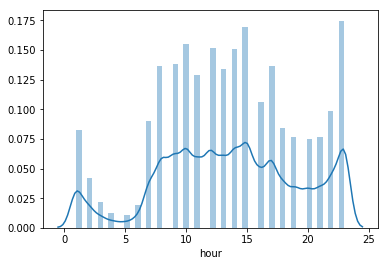

In [40]:
import seaborn as sns
expensive = df[df['costly']==True]
sns.distplot(df['hour'])

In [38]:
#too many at midnight - may be because time was not entered 
#will drop 

df = df[df['hour'] != 0]

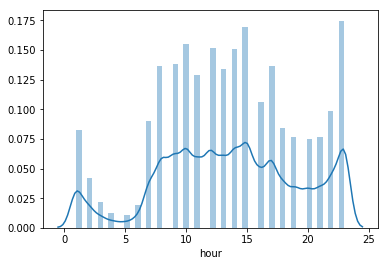

In [39]:
sns.distplot(df['hour'])

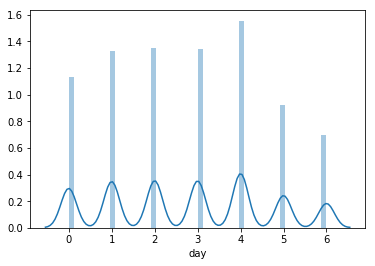

In [30]:
sns.distplot(expensive['day'])

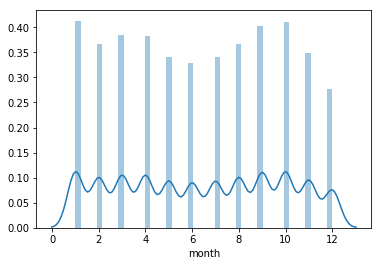

In [31]:
sns.distplot(expensive['month'])

In [41]:
#How much is given out in tickets by day
by_date = df.groupby('date').sum()

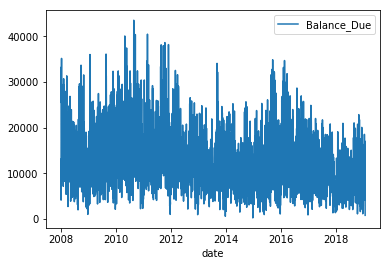

In [42]:
#How has total ticket income varried over time
%matplotlib inline

by_date.reset_index().plot(x='date', y='Balance_Due')

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
#create training data
train = df[:-1000]
test = df[-1000:]
X_train = train.drop(['costly','Balance_Due'], axis=1)
y_train = train['costly']

In [51]:
#create a baseline w/ mean
y_pred = np.full(shape=y_train.shape,fill_value = y_train.mean())
mean_absolute_error(y_train,y_pred)

0.4974423892132933

In [278]:
fb_columns = ['team','opponent','season','date','win/lose','score']
football = pd.read_csv('A&M Football Data - Sheet1.csv',header=None, names=fb_columns)
football.date = pd.to_datetime(football.date, format= '%m/%d/%Y')

In [289]:
df_10 = df[df['Violation_Date_Time'] > '2008-01-01 00:00:01']

In [291]:
fb_date = football.date
df_10['fb_game'] = df_10['Violation_Date_Time'].isin(fb_date)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [317]:
n_dummy_cols = ['day', 'month', 'hour','fb_game']
df_10_encoded = pd.get_dummies(df_10, columns= dummy_cols, drop_first=True)

In [318]:
df_10_encoded.head()

,index,Case_Number,Charge_Description,Violation_Date_Time,Violation_Street_Name,Balance_Due,Vehicle_Make,Vehicle_Model,date,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
154037,159035,154584,DISORDERLY CONDUCT NOISE PUBLIC,2008-01-01 00:28:00,2007 Texas Ave,430.0,NaN,NaN,1,2008,...,0,0,0,0,0,0,0,0,0,0
154038,159036,154562,NO INSURANCE,2008-01-01 00:28:00,700 UNIVERSITY DR E,419.0,MITS,MIRAGE,1,2008,...,0,0,0,0,0,0,0,0,0,0
154039,159037,154583,MINOR DRIVING UNDER THE INFLUENCE OF ALCOHOL 1...,2008-01-01 00:55:00,300 Church Avenue,500.0,NI,XT,1,2008,...,0,0,0,0,0,0,0,0,0,0
154040,159038,154563,NO INSURANCE,2008-01-01 00:58:00,1200 UNIVERSITY DR E,0.0,MERC,GRNDMA,1,2008,...,0,0,0,0,0,0,0,0,0,0
154041,159039,154586,PUBLIC INTOXICATION 1ST OFFENSE,2008-01-01 02:36:00,301 Texas,581.5,NaN,NaN,1,2008,...,0,0,0,0,0,0,0,0,0,0


In [319]:
df_10_encoded = df_10_encoded.drop(['Case_Number','index','Charge_Description','Violation_Street_Name','Vehicle_Make','Vehicle_Model'], axis = 1)

In [331]:
X_col = [
 'fb_game',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23']

In [332]:
X = df_10_encoded[X_col]
y = df_10_encoded.loc[:,'Balance_Due']
X_train, X_test, Y_train, Y_test = train_test_split(X.values, y.values, test_size=.5, random_state=13)

In [333]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [336]:
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 163.1219819722266
R^2 is 0.07550766020311128


In [337]:
print('Coefficients:\n')
for i in range(len(X)):
    print(list(X)[i], ': ', model.coef_[i])

Coefficients:

fb_game :  57.68935224663786
day_1 :  -0.724310589525245
day_2 :  -4.747414121034369
day_3 :  -2.90454692035865
day_4 :  3.442300284863011
day_5 :  -11.853868431194972
day_6 :  0.33336955042555705
month_2 :  -4.020871202043667
month_3 :  -8.413518405292505
month_4 :  -6.9113450029631815
month_5 :  -11.013378518205792
month_6 :  -11.43287523529587
month_7 :  -17.6004320086172
month_8 :  -13.316166835089827
month_9 :  -6.415979838176625
month_10 :  -9.215425102283824
month_11 :  -10.233674619849522
month_12 :  -7.512670075593037
hour_1 :  96.7544106544221
hour_2 :  174.83851464152505
hour_3 :  156.30224042945602
hour_4 :  143.77965052798046
hour_5 :  80.30460882561947
hour_6 :  33.9972608787164
hour_7 :  6.354528693871059
hour_8 :  -27.959271706854103
hour_9 :  -39.85223598558994
hour_10 :  -42.81011647253494
hour_11 :  -34.95764514498622
hour_12 :  -28.966338413813986
hour_13 :  -37.816959924828055
hour_14 :  -53.800773942514034
hour_15 :  -29.454759360203422
hour_16 :  -

IndexError: list index out of range

In [350]:
llist = df_10['Charge_Description'].value_counts()

In [351]:
type(llist)

pandas.core.series.Series

In [355]:
nlist = llist.where(llist != np.NaN)

In [356]:
nlist.where(nlist > 500)

SPEED 1-15 MPH OVER POSTED LIMIT                        44321.0
EXPIRED METER NG                                        22667.0
FAILURE TO APPEAR - CITATION                            13647.0
PARK - EXPIRED METER NORTHGATE                          11824.0
NO INSURANCE 1ST OFFENSE                                10138.0
SPEEDING 1-15 MPH OVER POSTED LIMIT                      8615.0
SPEED 16-24 MPH OVER POSTED LIMIT                        6802.0
SPEED SCHOOL ZONE 1-15 MPH OVER POSTED LIMIT             6160.0
PARK - EXPIRED METER Northgate                           5702.0
MINOR IN POSSESSION OF ALCOHOL 1ST OFFENSE               5686.0
PARKED FACING TRAFFIC                                    4510.0
LICENSE PLATE - EXPIRED REGISTRATION                     4448.0
PARK STOP STAND IN PROHIBITED AREA                       4335.0
PARK EXPIRED METER Northgate                             3803.0
RAN RED LIGHT                                            3634.0
INSPECTION STICKER - EXPIRED            

In [ ]:
#SPEED 1-15 MPH OVER POSTED LIMIT

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [372]:
tickets.head()

,index,Case_Number,Charge_Description,Violation_Date_Time,Violation_Street_Name,Balance_Due,Vehicle_Make,Vehicle_Model,date,year,day,month,hour,is_weekend,fb_game,warning
154071,159069,154618,SPEED 1-15 MPH OVER POSTED LIMIT,2008-01-02 09:47:00,1400 UNIVERSITY DR,302.0,BMW,328,1,2008,2,1,9,False,False,False
154090,159088,154598,SPEED 1-15 MPH OVER POSTED LIMIT,2008-01-02 12:58:00,1100 ROCK PRAIRIE RD,302.0,FORD,EXPEDI,1,2008,2,1,12,False,False,False
154139,159137,154663,SPEED 1-15 MPH OVER POSTED LIMIT,2008-01-03 11:50:00,1600 HARVEY MITCHELL PKWY S,302.0,DODG,RAM 35,1,2008,3,1,11,False,False,False
154171,159169,154656,SPEED 1-15 MPH OVER POSTED LIMIT,2008-01-03 17:22:00,2200 SH 6 S,302.0,MAZD,RX-8,1,2008,3,1,17,False,False,False
154202,159200,154732,SPEED 1-15 MPH OVER POSTED LIMIT,2008-01-04 09:59:00,1000 TEXAS AVE,302.0,KIA,SPECTR,1,2008,4,1,9,False,False,False


In [363]:
n_dummy_cols = ['day', 'month', 'hour','fb_game']
tickets_encoded = pd.get_dummies(tickets, columns= dummy_cols, drop_first=True)
tickets_encoded = tickets_encoded.drop(['Case_Number','index','Charge_Description','Violation_Street_Name','Vehicle_Make','Vehicle_Model'], axis = 1)

In [364]:
X = tickets_encoded[X_col]
y = tickets_encoded.loc[:,'Balance_Due']
X_train, X_test, Y_train, Y_test = train_test_split(X.values, y.values, test_size=.5, random_state=13)

In [365]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [366]:
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 91.220783607195
R^2 is -0.0004048035633623659


In [ ]:
tickets['Balance_Due'].value_counts()

In [373]:
tickets['warning'] = tickets['Balance_Due'].isin([0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
n_dummy_cols = ['day', 'month', 'hour','fb_game']
tickets_encoded = pd.get_dummies(tickets, columns= dummy_cols, drop_first=True)
tickets_encoded = tickets_encoded.drop(['Case_Number','index','Charge_Description','Violation_Street_Name','Vehicle_Make','Vehicle_Model'], axis = 1)

In [378]:
X = tickets_encoded[X_col]
y = tickets_encoded.loc[:,'warning']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.5, random_state=13)

In [397]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight ='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [386]:
warn = len(tickets[tickets['warning'] == True])

In [385]:
tick = len(tickets[tickets['warning'] == False])

In [388]:
1 - warn/len(tickets)

0.9948782744071659

In [390]:
from sklearn.metrics import classification_report

In [398]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n       False       1.00      0.66      0.79     22056\n        True       0.00      0.32      0.01       105\n\n   micro avg       0.66      0.66      0.66     22161\n   macro avg       0.50      0.49      0.40     22161\nweighted avg       0.99      0.66      0.79     22161\n'

In [403]:
print('Coefficients:\n')
for i in range(len(tickets_encoded)):
    print(list(X_col[i]), ': ', model.coef_[0][i])

Coefficients:

['f', 'b', '_', 'g', 'a', 'm', 'e'] :  0.0
['d', 'a', 'y', '_', '1'] :  -0.14284274783780693
['d', 'a', 'y', '_', '2'] :  -0.2140942561628328
['d', 'a', 'y', '_', '3'] :  0.3564408986507548
['d', 'a', 'y', '_', '4'] :  0.7540215645503516
['d', 'a', 'y', '_', '5'] :  0.3217997094800023
['d', 'a', 'y', '_', '6'] :  0.4675262950085172
['m', 'o', 'n', 't', 'h', '_', '2'] :  0.5390835624656514
['m', 'o', 'n', 't', 'h', '_', '3'] :  0.5278919440514107
['m', 'o', 'n', 't', 'h', '_', '4'] :  0.11335722417953384
['m', 'o', 'n', 't', 'h', '_', '5'] :  0.5955088306636998
['m', 'o', 'n', 't', 'h', '_', '6'] :  -0.2383221340227375
['m', 'o', 'n', 't', 'h', '_', '7'] :  0.0047292663351576475
['m', 'o', 'n', 't', 'h', '_', '8'] :  0.7657675423702267
['m', 'o', 'n', 't', 'h', '_', '9'] :  0.21333909784671742
['m', 'o', 'n', 't', 'h', '_', '1', '0'] :  0.6510586005181962
['m', 'o', 'n', 't', 'h', '_', '1', '1'] :  0.1329474825226353
['m', 'o', 'n', 't', 'h', '_', '1', '2'] :  0.476011024

IndexError: list index out of range